### NLP Exploratory Project
### Creating and testing a machine learning model to predict emotion in text
This dataset contains tweet data.  This includes raw text, dates and an assigned emotion to the text.  The goal of this project is to use this input data and create a model to predict the emotion of new tweet inputs.  first we will explore the dataset and clean it, then we will create a model to predict emotion on tweets.


In [365]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [366]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [367]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [368]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [369]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [370]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

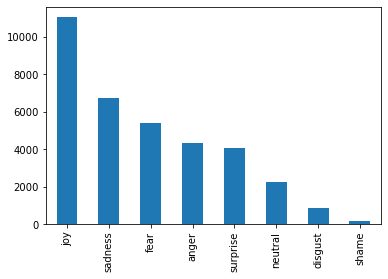

In [371]:
# Plot
%matplotlib inline

df['Emotion'].value_counts().plot(kind='bar')


C:\Users\Megan\anaconda3\envs\spacy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

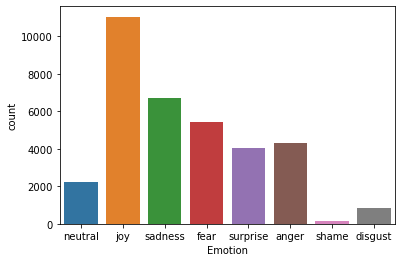

In [272]:
# Using Seaborne to plot.
sns.countplot(df['Emotion'])

<AxesSubplot:xlabel='Emotion', ylabel='count'>

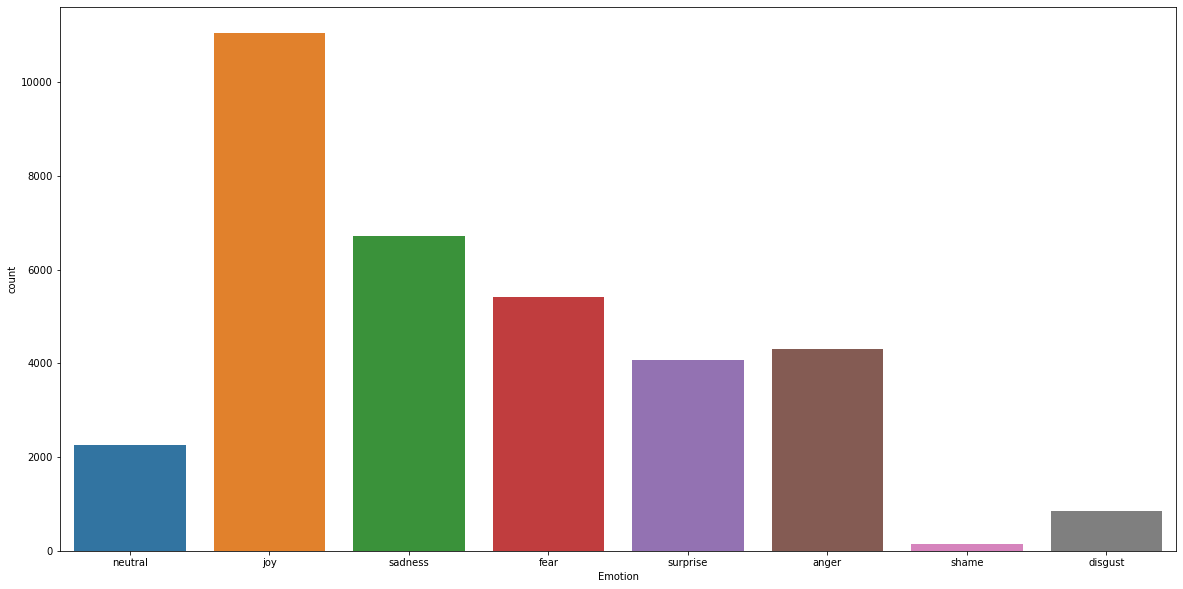

In [273]:
# New way to plot with resizing.
plt.figure(figsize=(20,10))
sns.countplot(x="Emotion",data=df)


### Exploration
Textblob is used to calculate the sentiment score for each tweet.  We then look at the sentiments per emotion category to understand the distribution.

We will clean text, perform sentiment analysis and extract keywords for each emotion.  We will create a Wordcloud

In [372]:
# Sentiment analysis
from textblob import TextBlob

In [379]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result
    

In [380]:
# Lets try testing the function
get_sentiment('I love camping')

'Positive'

In [381]:
# Lets try testing the function
get_sentiment('I hate camping')

'Negative'

In [382]:
# Now applying this fuction to the dataframe
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [383]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [279]:
# Viewing the composition of sentiments for each emotion.
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

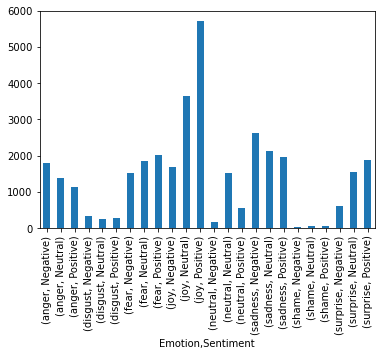

In [280]:
# first method using Matplotlib
# compare our emotion and sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\Megan\anaconda3\envs\spacy\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Megan\anaconda3\envs\spacy\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


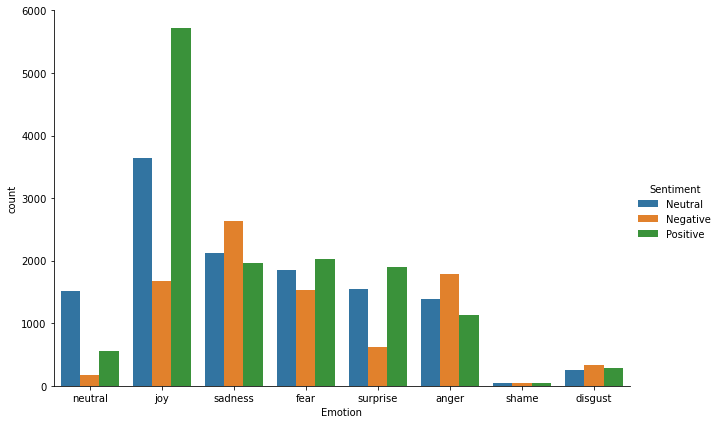

In [281]:
# using seaborn and trying factorplot
sns.factorplot(x='Emotion',hue='Sentiment',kind='count',data=df, size=6, aspect=1.5)

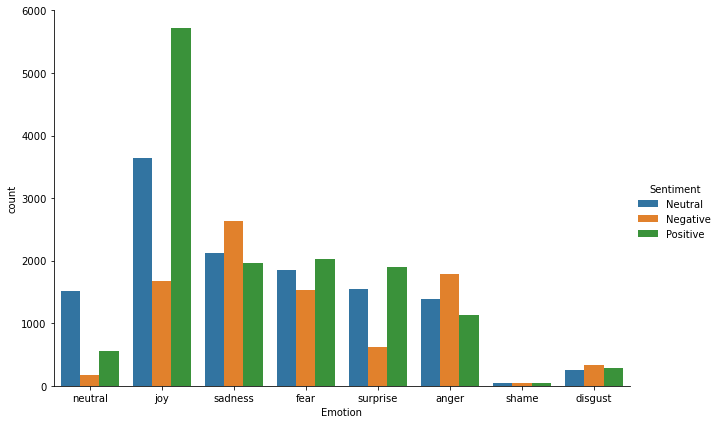

In [282]:
# using seaborn and trying catplot with the same data.
sns.catplot(x='Emotion',hue='Sentiment',kind='count',data=df, height=6, aspect=1.5)

### Text Cleaning
Now we will try to remove noise, stopwords, special characters, punctuations, emojis.

In [284]:
# These are all the differnt type of extraction we can do.
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [385]:
# First we will remove User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [386]:
# Next Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [387]:
# Last is punctuation
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [388]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,Positive,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,Neutral,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Neutral,Youu JEALOUSY #Losing YOU


### Keyword extraction
Now will utilize a function to extract the 50 most common words for each emotion.

In [389]:
from collections import Counter

In [290]:
# the function for extraction
def extract_keywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [291]:
# list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [292]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [391]:
# isolating the emotion of Joy from the dataframe
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [392]:
# Converting Joy into a document
joy_docx = ' '.join(joy_list)

In [393]:
# what it looks like
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome  brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming pap

In [395]:
# Nowe we run the function we made to extract the 50 most common keywords.
keyword_joy = extract_keywords(joy_docx)

In [396]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

### Word Cloud
Next we will make a word cloud with the words for emotion of Joy, using joy_docx we have created.

In [402]:
from wordcloud import WordCloud

In [403]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

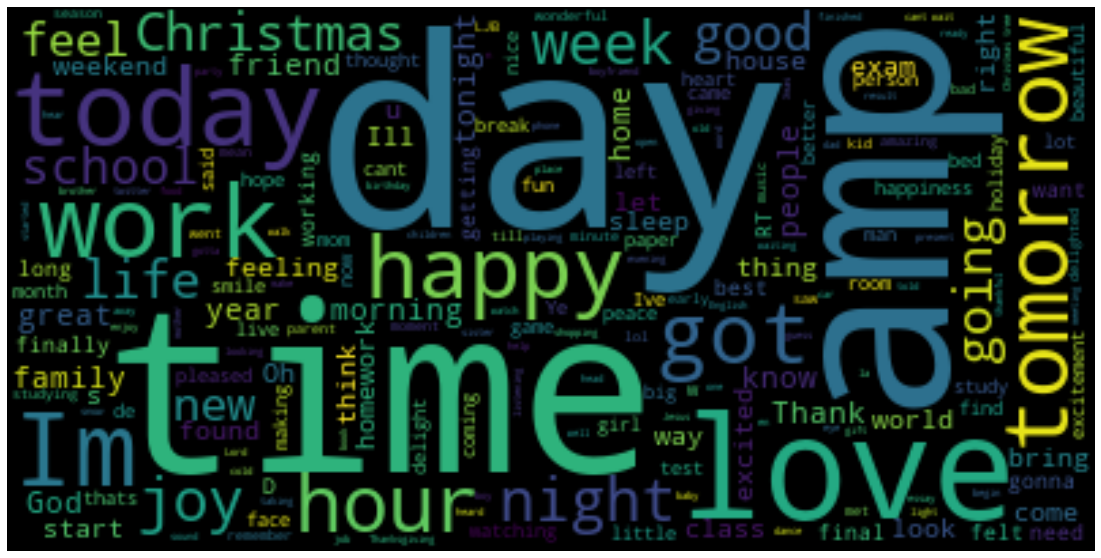

In [313]:
plot_wordcloud(joy_docx)

### Machine Learning
Taking the tweet text and emotion dataset to create a model that will predict the emotion in the text provide a confidence level.  We will use the sci kit package

In [336]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers vectorize
from sklearn.feature_extraction.text import CountVectorizer
# split our dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [404]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [405]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [406]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [407]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [408]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\Megan\anaconda3\envs\spacy\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [409]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [410]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.622341444721211

In [411]:
# Make A Prediction
ex1 = " What an exciting day "

In [363]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [126]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.18360845, 0.01071163, 0.0246833 , 0.58083965, 0.0133597 ,
        0.10736575, 0.00064244, 0.07878908]])

In [127]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [412]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()